<a href="https://colab.research.google.com/github/stereoVibe/AVLoadingIndicatorView/blob/master/Copy_of_neural_course_01_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание рукописных цифр из набора данных MNIST с помощью Keras


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [0]:
# В Keras встроены средства работы с популярными наборами данных
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


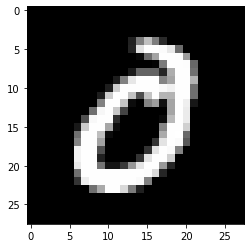

In [0]:
n = 1304
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [0]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [0]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train.astype('float32')
x_train = x_train / 255 

**Работа с правильными ответами**

In [0]:
print(y_train_org[n])

0


**Преобразуем метки в формат one hot encoding**

In [0]:
y_train = utils.to_categorical(y_train_org, 10)

**Правильный ответ в формате one hot encoding**

In [0]:
print(y_train[n])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [0]:
model = Sequential()

**Добавляем уровни сети**

Архитектуру сети взяли по ссылке - https://en.wikipedia.org/wiki/MNIST_database


In [0]:
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


**Компилируем сеть**

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [0]:
model.fit(x_train, y_train, batch_size=200, epochs=20,  verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2756 - acc: 0.9213
Epoch 2/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1106 - acc: 0.9674
Epoch 3/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0713 - acc: 0.9797
Epoch 4/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0504 - acc: 0.9857
Epoch 5/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0361 - acc: 0.9899
Epoch 6/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0272 - acc: 0.9922
Epoch 7/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0200 - acc: 0.9949
Epoch 8/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0153 - acc: 0.9963
Epoch 9/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0108 - acc: 0.9978
Epoch 10/20
60000/60000 [=========

## Сохраняем обученную нейронную сеть

Записываем обученную нейронную сеть в файл `mnist_dense.h5`

In [0]:
model.save("mnist_dense.h5")


Проверяем, что файл сохранился

In [0]:
!ls

mnist_dense.h5	sample_data


**Сохраняем файлы на локальный компьютер**

In [0]:
files.download("mnist_dense.h5")

KeyboardInterrupt: ignored

Если хотите использовать обученную нейронную сеть на своем компьютере:

```
from keras.models import load_model
model = load_model('mnist_dense.h5')
```

## Используем сеть для распознавания рукописных цифр

In [0]:
n_rec = 487

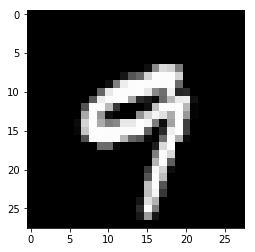

In [0]:
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

**Меняем размерность изображения и нормализуем его**

In [0]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [0]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [0]:
print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


**Преобразуем результаты из формата one hot encoding**

In [0]:
prediction = np.argmax(prediction)
print(prediction)

9


**Печатаем правильный ответ**

In [0]:
print(y_test_org[n_rec])

9


## Загружаем свою картинку

In [0]:
files.upload()

{}

Проверяем загрузку картинки

In [0]:
!ls

'111 (1).png'   111.png   mnist_dense.h5   sample_data


Загружаем картинку из файла

In [0]:
img_path = '111 (1).png'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

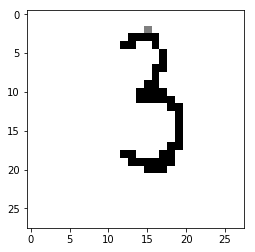

In [0]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [0]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [0]:
prediction = model.predict(x)

Результаты распознавания

In [0]:
prediction

array([[5.6303065e-06, 2.7761312e-04, 3.2714938e-04, 9.9935585e-01,
        1.5646013e-06, 6.0529383e-06, 1.1915630e-05, 8.6356595e-06,
        5.5654646e-06, 7.7320941e-08]], dtype=float32)

In [0]:
print(np.argmax(prediction))

3


## Домашнее задание


1.  Сохранить копию ноутбука себе в Google Drive (File->Save a copy in Drive...)
2.  Научитесь запускать ноутбук, обучать сеть и использовать ее для распознавания рукописных цифр MNIST.
3. Попробуйте сами написать рукописную цифру и распознать ее с помощью сети.
4. Попробуйте улучшить качества работы сети.





## Установка Keras и TensorFlow на свой компьютер

Все домашние задания в курсе можно сделать на платформе Google Colaboratory. Ноутбуки с Google Colaboratory останутся у вас после завершения курса, и вы сможете их запускать. Поэтому устанавливать Keras и TensorFlow на свой компьютер для выполнения заданий в курсе не обязательно. Более того, мы не рекомендуем это делать, т.к. установка иногда может быть очень сложной и на нее тратится много времени. Но если вы все-таки хотите установить библиотеки себе, то вот инструкции:

1. [Установка TensorFlow в Anaconda с помощью pip](https://www.asozykin.ru/deep_learning/2018/03/30/TensorFlow-Anaconda-Pip-Install.html).
2. [Установка Keras с TensorFlow в Anaconda](https://www.asozykin.ru/deep_learning/2017/09/07/Keras-Installation-TensorFlow.html).

Сразу хотим предупредить, что инструкции срабатывают не всегда. Но у большинства установить получается.